## **1. Color image restoration by histogram equalization**

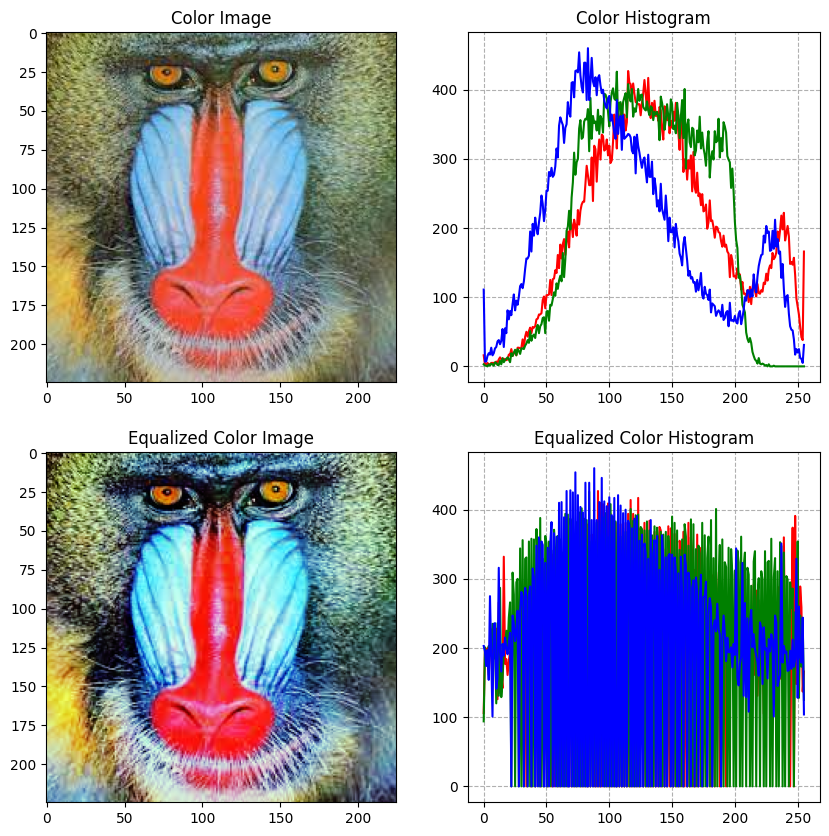


Độ sáng trung bình của ảnh trước: 113.81 và ảnh sau: 127.91
Độ nhiễu của ảnh trước: 39.6 và ảnh sau: 60.38
Số lượng điểm ảnh của ảnh trước: 151875 và ảnh sau: 151875
Độ tương phản của ảnh trước: 0.41 và ảnh sau: 0.57
MSE: 105.94
PSNR: 37.42


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
os.chdir('/content/drive/MyDrive/ColabNotebooks')
color_img = cv2.imread('DCT1203_3120410382.jpg')
#color_img = cv2.GaussianBlur(cv2.imread('test_image.jpg'),(5,5),0.8)

# Split the image into its color channels
b, g, r = cv2.split(color_img)

# Compute the histograms for each color channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256]) 
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Apply histogram equalization to each channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_color_img = cv2.merge((eq_b, eq_g, eq_r))

# Compute the histograms for each channel of the equalized image
equalized_hist_r = cv2.calcHist([eq_r], [0], None, [256], [0, 256])
equalized_hist_g = cv2.calcHist([eq_g], [0], None, [256], [0, 256])
equalized_hist_b = cv2.calcHist([eq_b], [0], None, [256], [0, 256])

# Plot the original color image, its histogram, the equalized color image, and its histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)) #BGR là một không gian màu mặc định được sử dụng trong OpenCV nên cần phải chuyển sang RGB
axes[0, 0].set_title('Color Image')

axes[0, 1].plot(hist_r, color='r')
axes[0, 1].plot(hist_g, color='g')
axes[0, 1].plot(hist_b, color='b')
axes[0, 1].set_title('Color Histogram')
axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(True, linestyle='--', zorder=0)
axes[1, 0].imshow(cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Equalized Color Image')

axes[1, 1].plot(equalized_hist_r, color='r')
axes[1, 1].plot(equalized_hist_g, color='g')
axes[1, 1].plot(equalized_hist_b, color='b')
axes[1, 1].set_title('Equalized Color Histogram')
axes[1, 1].grid(True, linestyle='--', zorder=0)
axes[1, 1].set_axisbelow(True)

# Display the plot
plt.show()

# Tính độ sáng trung bình

print('\nĐộ sáng trung bình của ảnh trước:', round(cv2.mean(color_img)[0],2), 'và ảnh sau:', round(cv2.mean(equalized_color_img)[0],2))

# Chuyển ảnh màu sang không gian màu HSV và YCbCr

hsv_img_before = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
ycbcr_img_before = cv2.cvtColor(color_img, cv2.COLOR_BGR2YCR_CB)

hsv_img_after = cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2HSV)
ycbcr_img_after = cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2HSV)

# Tính độ nhiễu cho từng kênh màu

std_dev_h_before = np.std(hsv_img_before[:, :, 0])
std_dev_s_before = np.std(hsv_img_before[:, :, 1])
std_dev_v_before = np.std(hsv_img_before[:, :, 2])

std_dev_y_before = np.std(ycbcr_img_before[:, :, 0])
std_dev_cb_before = np.std(ycbcr_img_before[:, :, 1])
std_dev_cr_before = np.std(ycbcr_img_before[:, :, 2])

std_dev_h_after = np.std(hsv_img_after[:, :, 0])
std_dev_s_after = np.std(hsv_img_after[:, :, 1])
std_dev_v_after = np.std(hsv_img_after[:, :, 2])

std_dev_y_after = np.std(ycbcr_img_after[:, :, 0])
std_dev_cb_after = np.std(ycbcr_img_after[:, :, 1])
std_dev_cr_after = np.std(ycbcr_img_after[:, :, 2])

# Tính toán độ nhiễu 

noise_img_before = np.mean([std_dev_h_before, std_dev_s_before, std_dev_v_before, std_dev_y_before, std_dev_cb_before, std_dev_cr_before])
noise_img_after = np.mean([std_dev_h_after, std_dev_s_after, std_dev_v_after, std_dev_y_after, std_dev_cb_after, std_dev_cr_after])

print('Độ nhiễu của ảnh trước:', round(noise_img_before,2), 'và ảnh sau:', round(noise_img_after,2))


# Tổng số điểm ảnh của ảnh màu: Số pixel chiều rộng x số pixel chiều cao x số kênh màu

height_before, width_before =  color_img.shape[:2]
height_after, width_after = equalized_color_img.shape[:2]
resolution_before = width_before * height_before * 3
resolution_after = width_after * height_after * 3

print("Số lượng điểm ảnh của ảnh trước:", resolution_before,"và ảnh sau:", resolution_after)

# Tính độ tương phản bằng cách tính độ lệch chuẩn của từng kênh màu (giá trị pixel) và sau đó lấy giá trị trung bình cả 3 kênh màu

std_r_before = np.std(color_img[:, :, 0])
mean_r_before = np.mean(color_img[:, :, 0])

std_g_before = np.std(color_img[:, :, 1])
mean_g_before = np.mean(color_img[:, :, 1])

std_b_before = np.std(color_img[:, :, 2])
mean_b_before = np.mean(color_img[:, :, 2])

constrast_before =  ((std_r_before / mean_r_before) + (std_g_before / mean_g_before) + (std_b_before / mean_g_before)) / 3

std_r_after = np.std(equalized_color_img[:, :, 0])
mean_r_after = np.mean(equalized_color_img[:, :, 0])

std_g_after = np.std(equalized_color_img[:, :, 1])
mean_g_after = np.mean(equalized_color_img[:, :, 1])

std_b_after = np.std(equalized_color_img[:, :, 2])
mean_b_after = np.mean(equalized_color_img[:, :, 2])

constrast_after =  ((std_r_after / mean_r_after) + (std_g_after / mean_g_after) + (std_b_after / mean_g_after)) / 3

print("Độ tương phản của ảnh trước:", round(constrast_before, 2), "và ảnh sau:", round(constrast_after, 2))

# Tính MSE (Mean Square Error): Chỉ số đánh giá độ chính xác của thuật toán xử lý ảnh

mse = np.mean((color_img - equalized_color_img) ** 2)
print("MSE:", round(mse, 2))

# Tính PSNR (Peak Signal to Noise Raito): Chỉ số đánh giá chất lượng của ảnh

psnr = 20 * np.log10(765) - 10 * np.log10(mse) # 765 là do ảnh màu có 3 kênh R, G, B nên 255 * 3 = 765
print("PSNR:", round(psnr, 2))

In [ ]:
### TODO 1: Write a essay in English or Vietnamese to evaluate the above result.
"""
    Cân bằng histogram là một kỹ thuật xử lý ảnh được sử dụng để cải thiện độ tương phản và màu sắc của ảnh bằng cách
  thay đổi phân bố giá trị màu của ảnh. Khi ảnh có phân bố giá trị màu không đồng đều, tức là một số khu vực của ảnh 
  có tần suất xuất hiện của các giá trị màu cao hơn so với khu vực khác, thì ảnh sẽ mất cân bằng về độ tương phản và 
  màu sắc. Kỹ thuật cân bằng histogram sẽ giúp phân bố các giá trị màu trong ảnh trở nên đồng đều hơn, từ đó cải thiện 
  độ tương phản và màu sắc của ảnh.
      
    Yêu cầu: Sử dụng phương pháp cân bằng histogram để giúp phân bố giá trị màu trên ảnh đồng đều hơn, cải thiện độ sáng, 
  độ tương phản và màu sắc của ảnh. Giữ nguyên được sự cân đối giữa các kênh màu trong ảnh. Từ đó ảnh sau khi được xử lý 
  sẽ có độ tương phản tốt, màu sắc tự nhiên, độ sáng cao hơn, chất lượng và trung thực hơn.

    Nhận xét:

      1. Histogram: 
      
      - Histogram thứ nhất trước khi cân bằng có dạng chữ S cho thấy các giá trị ban đầu tập trung nhiều ở khoảng giá trị
      từ 50 - 200, trong khi khoảng giá trị ngoài khoảng này có số lượng rất ít. Khoảng giá trị từ 0 - 50 chỉ có số lượng
      điểm ảnh rất thấp, và khoảng giá trị từ 200 - 255 cũng có số lượng điểm ảnh thấp hơn so với giá trị từ 50 - 200. 
      Biểu đồ đã cho thấy sự mất cân bằng giữa các giá trị hình ảnh, có các khu vực chênh lệch mức độ độ sáng lớn trên ảnh, 
      và các giá trị độ sáng tập trung chủ yếu vào mức trung bình. Điều này sẽ làm ảnh mất cân đối về các màu sắc và độ 
      tương phản, các vùng sáng, vùng tối, vùng trung bình không được thể hiện rõ ràng.

      - Histogram thứ hai sau khi thực hiện cân bằng cho thấy rằng phân bố các giá trị của ảnh đã được cân bằng đều hơn 
      so với histogram trước đó. Các khoảng giá trị từ 0 đến 255 đều có số lượng điểm ảnh tương đối đồng đều, không còn
      tập trung quá nhiều ở một vùng giá trị nhất định. Kết quả biểu đồ đã giúp cải thiện đáng kể sự phân bố giá trị của ảnh
      ban đầu, tăng tính đồng đều của ảnh và giảm thiểu sự mất cân bằng giữa các giá trị của hình ảnh. Nhờ có cân bằng 
      histogram nên các vùng sáng, tối, hay trung bình trên ảnh được thể hiện rõ ràng, hiệu ứng màu không tự nhiên cũng được giảm.

      2. Hình ảnh:

      - Ảnh trước khi cân bằng có độ tương phản thấp, sự khác biệt giữa các mức độ sáng trên ảnh không rõ ràng nên 
      dẫn đến việc các chi tiết trên ảnh bị mất mát hoặc trở nên mờ đi. Màu sắc của ảnh cũng bị tuỳ chỉnh không đúng cách
      gây nên hiệu ứng màu không tự nhiên.

      - Ảnh sau khi cân bằng có độ tương phản được cải thiện đáng kể, màu sắc của ảnh trở nên tươi sáng hơn, rõ nét hơn, 
      trung thực hơn, các chi tiết được tôn lên do độ chênh lệch  độ sáng giữa các vùng trên ảnh giảm xuống. Độ tương phản
      giữa các vùng trên khuôn mặt được cân bằng hơn và các chi tiết như nếp nhăn, lông, đôi mắt, đường viền trên khuôn mặt
      được làm rõ nét hơn.

      3. Tổng số điểm ảnh: Tổng số điểm của ảnh trước và sau khi cân bằng là giống nhau, bằng 151875.

      4. Phân bố giá trị: Khi cân bằng histogram, các giá trị màu trong ảnh được phân bố đều hơn, tạo ra dạng histogram
      có dạng đều hơn trước khi cân bằng, làm tăng độ tương phản và cải thiện chất lượng hình ảnh, các giá trị màu 
      xuất hiện với tần suất dày. Phân bố của ảnh trước khi xử lý không đồng đều do ảnh có vùng sáng tối khác nhau, 
      sau khi cân bằng thì vùng giá trị ở các kênh màu tăng cường ở các vùng thấp, giảm giá trị ở các vùng tăng.

      5. Độ tương phản: Sau khi cân bằng ảnh, các đỉnh màu tăng độ cao hơn, khoảng cách của các đỉnh được bảo tồn,
      phân bố đồng đều, dẫn đến độ tương phản và độ phân giải màu sắc của ảnh được cải thiện, các chi tiết của ảnh
      được hiển thị rõ ràng. Độ tương phản trước khi cân bằng là 0.41 và sau khi cân bằng là 0.57.

      6. Độ sáng trung bình: Với giá trị trước khi cân bằng là 113.81 và sau khi cân bằng là 127.91 thì ta có thể
      thấy rằng, độ sáng trung bình của ảnh đã được tăng lên, làm cho ảnh sáng hơn và có độ tương phản cao hơn, 
      và độ sáng trung bình sau khi equalized được cải thiện hợp lý, không làm mất chi tiết ảnh nào.
      
      7. Độ nhiễu: Độ nhiễu của ảnh trước khi cân bằng và sau khi cân bằng là 39.6 và 60.38. Một phần do ảnh ban đầu
      đã bị nhiễu, cho nên áp dụng phương pháp cân bằng Histogram không phù hợp nhưng vẫn tăng độ tương phản và cải thiện
      chất lượng của ảnh.
      
      8. MSE: Giá trị của MSE là 105.94, điều này cho thấy độ lỗi giữa ảnh gốc và ảnh sau khi cân bằng là khá lớn, 
      có sự thay đổi đáng kể so với ảnh gốc. Điều này có thể là do ảnh ban đầu đã chứa nhiều nhiễu, nét ảnh không rõ ràng
      nên khiến cho giá trị MSE cao.

      9. PSNR: là độ đo được sử dụng để so sánh chất lượng của hình ảnh, được tính bằng cách so sánh hình ảnh gốc với hình ảnh
      qua xử lý, đánh giá độ mất mát thông tin. Giá trị của PSNR càng cao thì độ tương đồng giữa hình ảnh gốc và hình ảnh được
      xử lý càng cao. Với giá trị PSNR trên 30 dB thì hình ảnh đã được đánh giá là rất cao và khó phát hiện về chất lượng 
      giữa hình ảnh gốc và hình ảnh xử lý. Và PSNR được tính toán ở trên là 37.42.
"""

## **2. Gray-scale image restoration by histogram equalization**

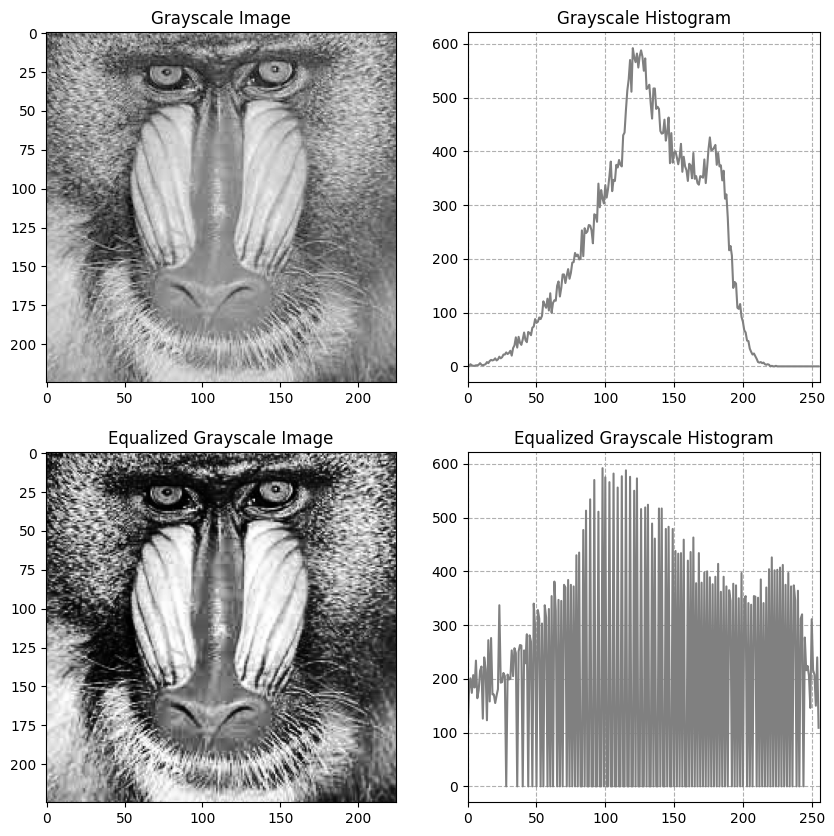


Độ sáng trung bình của ảnh trước: 130.36 và ảnh sau: 128.45
Độ nhiễu của ảnh trước: 38.52 và ảnh sau: 73.72
Độ tương phản của ảnh trước: 0.3 và ảnh sau: 0.57
Số lượng điểm ảnh của ảnh trước: 50625 và ảnh sau: 50625


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
os.chdir('/content/drive/MyDrive/ColabNotebooks')
gray_img = cv2.imread('DCT1203_3120410382.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the histogram for the grayscale image
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# Apply histogram equalization to the grayscale image
eq_gray_img = cv2.equalizeHist(gray_img)

# Compute the histogram for the equalized grayscale image
hist_eq_gray = cv2.calcHist([eq_gray_img], [0], None, [256], [0, 256])

# Plot the original grayscale image and its histogram, as well as the equalized grayscale image and its histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].imshow(gray_img, cmap='gray')
axes[0, 0].set_title('Grayscale Image')

axes[0, 1].plot(hist_gray, color='gray')
axes[0, 1].set_title('Grayscale Histogram')
axes[0, 1].set_xlim([0, 256])
axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(True, linestyle='--', zorder=0)

axes[1, 0].imshow(eq_gray_img, cmap='gray')
axes[1, 0].set_title('Equalized Grayscale Image')

axes[1, 1].plot(hist_eq_gray, color='gray')
axes[1, 1].set_title('Equalized Grayscale Histogram')
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_axisbelow(True)
axes[1, 1].grid(True, linestyle='--', zorder=0)

# Display the plot
plt.show()

# Tìm độ sáng trung bình của 2 ảnh

brightness_before = np.mean(gray_img)
brightness_after = np.mean(eq_gray_img)
print('\nĐộ sáng trung bình của ảnh trước:', round(brightness_before, 2), 'và ảnh sau:', round(brightness_after, 2))

# Tìm độ nhiễu của 2 ảnh

std_dev_img_before = np.std(gray_img)
std_dev_img_after = np.std(eq_gray_img)

noise_img_before = np.sqrt(np.mean((gray_img - brightness_before) ** 2))
noise_img_after = np.sqrt(np.mean((eq_gray_img - brightness_after) ** 2))

print('Độ nhiễu của ảnh trước:', round(noise_img_before,2), 'và ảnh sau:', round(noise_img_after,2))

# Độ tương phản của 2 ảnh bằng cách biểu diễn độ lệch chuẩn của các giá trị pixel trong ảnh (standard deviation)

std_before = np.std(gray_img)
std_after = np.std(eq_gray_img)
mean_before = np.mean(gray_img)
mean_after = np.mean(eq_gray_img)
constrast_before = std_before / mean_before
constrast_after = std_after / mean_after

print("Độ tương phản của ảnh trước:", round(constrast_before,2), "và ảnh sau:", round(constrast_after,2))

# Độ phân giải/số lượng điểm ảnh biểu diễn = chiều cao x chiều rộng của ảnh

height_before, width_before = gray_img.shape[:2]
height_after, width_after = eq_gray_img.shape[:2]
print("Số lượng điểm ảnh của ảnh trước:", height_before * width_before, "và ảnh sau:", height_after * width_after)



In [ ]:
### TODO 2: Write a essay in English or Vietnamese to evaluate the above result.
'''
    Cân bằng histogram ảnh xám là quá trình điều chỉnh độ tương phản của ảnh bằng cách phân bố lại giá trị của 
  các mức xám để tạo ra một histogram có phân bố đồng đều trên toàn bộ phạm vi giá trị của ảnh xám, từ 0 đến 255. 
  Quá trình cân bằng histogram có thể được thực hiện bằng cách tính toán histogram của ảnh đầu vào và sử dụng nó
  để tính toán hàm chuyển đổi để tạo ra ảnh đầu ra. Quá trình này giúp cải thiện độ tương phản và độ sáng của 
  ảnh xám, tăng cường các chi tiết và giúp ảnh trở nên đẹp hơn. Kết quả của quá trình cân bằng histogram là một 
  ảnh xám mới với phân bố đồng đều giữa các mức xám, có độ tương phản cao hơn và chi tiết rõ ràng hơn.
   
    Yêu cầu: Điều chỉnh độ tương phản của ảnh bằng cách phân bố lại giá trị của các mức xám để tạo ra một 
  histogram có phân bố đồng đều trên toàn bộ phạm vị giá trị của ảnh xám. Áp dụng phương pháp này giúp cải thiện
  độ sáng của ảnh xám, tăng cường các chi tiết và giúp ảnh trở nên đẹp hơn.

    Nhận xét:

      1. Histogram:

      - Histogram thứ nhất trước khi cân bằng cho thấy các giá trị ban đầu tập trung nhiều ở khoảng giá trị từ 
      50 - 175, trong khi khoảng giá trị ngoài khoảng này có số lượng pixel rất ít. Khoảng giá trị từ 0 - 50 
      chỉ có số lượng điểm ảnh rất thấp, và khoảng giá trị từ 200 - 255 cũng có số lượng điểm ảnh giảm dần về 
      phía sau. Điều này cho thấy pixel chỉ tập trung nhiều ở mức sáng trung bình, làm cho ảnh có độ tương phản
      thấp, chênh lệch giữa các vùng tối và các vùng sáng không rõ ràng, chưa điều chỉnh tốt, các chi tiết ảnh
      không được thể hiện rõ nét.
      
      - Histogram thứ hai sau khi thực hiện cân bằng cho thấy rằng phân bố các giá trị của ảnh đã được cân bằng
      đều hơn so với histogram trước đó. Các khoảng giá trị từ 0 đến 255 đều có số lượng điểm ảnh tương đối 
      đồng đều, không còn tập trung quá nhiều ở một vùng giá trị nhất định. Kết quả biểu đồ đã giúp cải thiện 
      đáng kể sự phân bố giá trị của ảnh ban đầu, tăng tính đồng đều của ảnh và giảm thiểu sự mất cân bằng giữa 
      các giá trị của hình ảnh. Nhưng histogram này có sự phân bố đồng đều trên toàn bộ khoảng giá trị nên 
      ảnh có thể có mức độ tương phản trung bình.

      2. Hình ảnh:

      - Ảnh trước khi xử lý có mật độ sáng không rõ ràng, có độ tương phản khá thấp, màu sắc của ảnh không được 
      tự nhiên, một số khu vực trên ảnh bị mờ, ví dụ như các chi tiết trên lông và râu của con khỉ.

      - Ảnh sau khi được xử lý bằng phương pháp cân bằng histogram thì khuôn mặt con khỉ trở nên rõ nét hơn, 
      độ tương phản giữa các vùng trên khuôn mặt được cân bằng hơn và các chi tiết như nếp nhăn, lông, đôi mắt,
      đường viền trên khuôn mặt được làm rõ nét hơn. Độ tương phản của ảnh được cân bằng lại, vùng sáng và 
      vùng tối cũng được cân bằng để ảnh có độ chi tiết tốt hơn.

      3. Tổng số điểm ảnh: Tổng số lượng pixel của ảnh trước và sau khi cân bằng Histogram là giống nhau, đều 
      bằng 50625

      4. Phân bố giá trị: Phân bố giá trị của ảnh trước khi xử lý không đồng đều, có các vùng sáng tối khác nhau,
      các giá trị xám sau khi cân bằng histogram trở nên phân bố đều hơn trên toàn bộ phạm vi từ 0-255. Điều đó
      làm tăng độ tương phản các chi tiết của ảnh, khiến cho hình ảnh trở nên sắc nét hơn, vùng giá trị 
      tăng cường ở các vùng thấp, cân bằng hoặc giảm giá trị của các vùng tăng cao, các đỉnh xám tăng cao hơn,
      khoảng cách giữa các đỉnh phân bố đồng đều làm ảnh sẽ có độ tương phản cao hơn.

      5. Độ tương phản: Độ tương phản trước khi xử lý là 0.3 và sau khi xử lý là 0.57, điều này cho thấy sự 
      cải thiện rõ rệt giữa các ảnh, tăng độ tương phản của ảnh làm ảnh trở nên rõ nét và dễ phân biệt, nâng cao
      chất lượng hình ảnh.

      6. Độ sáng trung bình: Với giá trị trước là 130.36 và sau khi cân bằng là 128.45 thì ta có thể thấy rằng, 
      độ sáng trung bình của ảnh đã được giảm xuống do sau khi xử lý thì giá trị độ sáng phân bố đều hơn. Mặc dù
      giảm độ sáng, nhưng nó không làm mất đi các chi tiết mà ngược lại làm nổi bật các chi tiết hơn. Ví dụ 
      các phần lông trên mặt ban đầu bị mờ hoặc bị che bởi độ sáng cao nhưng sau khi cân bằng thì các chi tiết đó
      được tô đậm hơn và hiển thị rõ hơn, và ảnh có độ tối hơn.
  
      7. Độ nhiễu: Trước và sau là 38.52 và 73.72, tăng gần gấp đôi so với trước đó. Việc tăng độ nhiễu xảy ra 
      do ảnh ban đầu đã có độ nhiễu cao, các giá trị pixel quá gần nhau và gom lại một khoảng giá trị nhỏ, 
      khiến cho các nhiễu cũng bị gom lại và trở nên rõ ràng hơn.

'''

## **3. Color image restoration by gamma correction**

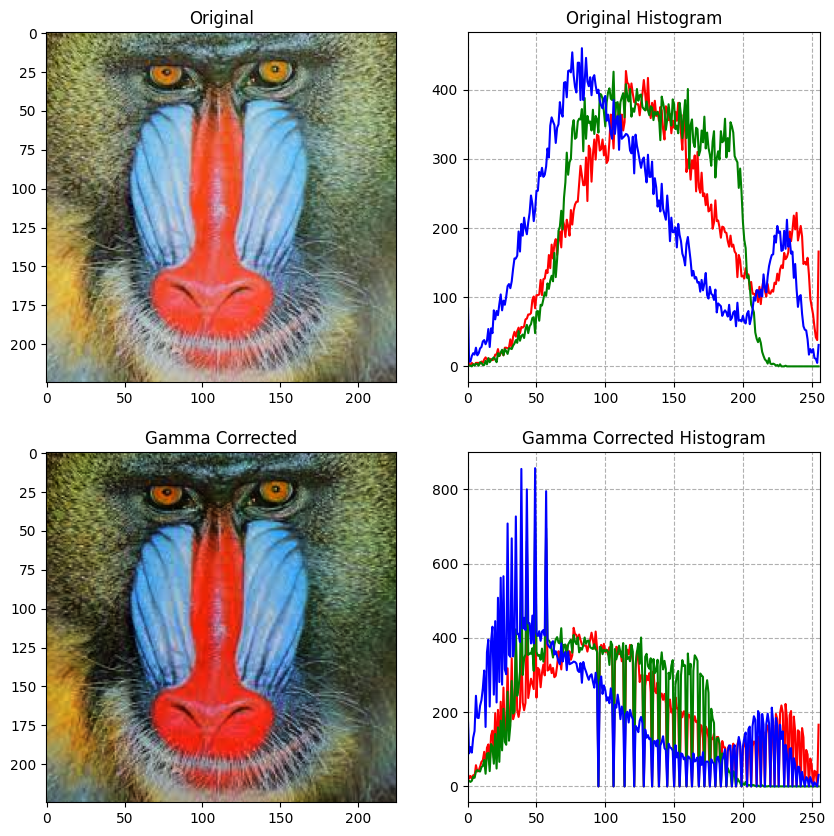


Độ nhiễu của ảnh trước: 39.6 và ảnh sau: 55.17
Số lượng điểm ảnh của ảnh trước: 151875 và ảnh sau: 151875
Độ tương phản của ảnh trước:  0.41 và ảnh sau: 0.61
Độ sáng trung bình của ảnh trước: 113.81 và ảnh sau: 82.58
MSE: 117.48
PSNR: 36.97


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
os.chdir('/content/drive/MyDrive/ColabNotebooks')
color_img = cv2.imread('DCT1203_3120410382.jpg')

# Split the image into its color channels
b, g, r = cv2.split(color_img)

# Define the gamma value
gamma = 1.5

# Compute the look-up table for gamma correction
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

# Apply gamma correction to each color channel using the look-up table
gamma_corrected_b = cv2.LUT(b, table)
gamma_corrected_g = cv2.LUT(g, table)
gamma_corrected_r = cv2.LUT(r, table)

# Merge the gamma corrected color channels back into a color image
gamma_corrected_color_img = cv2.merge((gamma_corrected_b, gamma_corrected_g, gamma_corrected_r))

# Compute the histograms for the original and gamma corrected color images
hist_color_img_r = cv2.calcHist([r], [0], None, [256], [0, 256]) 
hist_color_img_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_color_img_b = cv2.calcHist([b], [0], None, [256], [0, 256])

hist_gamma_r = cv2.calcHist([gamma_corrected_r], [0], None, [256], [0, 256])
hist_gamma_g = cv2.calcHist([gamma_corrected_g], [0], None, [256], [0, 256])
hist_gamma_b = cv2.calcHist([gamma_corrected_b], [0], None, [256], [0, 256])

# Plot the original and gamma corrected color images and their histograms
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Original color image
ax[0,0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Original')

# Original color image histogram
ax[0,1].plot(hist_color_img_r, color='r')
ax[0,1].plot(hist_color_img_g, color='g')
ax[0,1].plot(hist_color_img_b, color='b')
ax[0,1].set_xlim([0, 256])
ax[0,1].set_title('Original Histogram')
ax[0,1].set_axisbelow(True)
ax[0,1].grid(True, linestyle='--', zorder=0)

# Gamma corrected color image
ax[1,0].imshow(cv2.cvtColor(gamma_corrected_color_img, cv2.COLOR_BGR2RGB))
ax[1,0].set_title('Gamma Corrected')

# Gamma corrected color image histogram
ax[1,1].plot(hist_gamma_r, color='r')
ax[1,1].plot(hist_gamma_g, color='g')
ax[1,1].plot(hist_gamma_b, color='b')
ax[1,1].set_xlim([0, 256])
ax[1,1].set_title('Gamma Corrected Histogram')
ax[1,1].set_axisbelow(True)
ax[1,1].grid(True, linestyle='--', zorder = 0)

# Display the plot
plt.show()

# Chuyển ảnh sang ảnh màu sang không gian màu HSV và YCbCr
hsv_img_before = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
ycbcr_img_before = cv2.cvtColor(color_img, cv2.COLOR_BGR2YCR_CB)
hsv_img_after = cv2.cvtColor(gamma_corrected_color_img, cv2.COLOR_BGR2HSV)
ycbcr_img_after = cv2.cvtColor(gamma_corrected_color_img, cv2.COLOR_BGR2HSV)

# Tính độ nhiễu cho từng kênh màu và sau đó tính giá trị độ nhiễu trung bình của ảnh
std_dev_h_before = np.std(hsv_img_before[:, :, 0])
std_dev_s_before = np.std(hsv_img_before[:, :, 1])
std_dev_v_before = np.std(hsv_img_before[:, :, 2])
std_dev_y_before = np.std(ycbcr_img_before[:, :, 0])
std_dev_cb_before = np.std(ycbcr_img_before[:, :, 1])
std_dev_cr_before = np.std(ycbcr_img_before[:, :, 2])
std_dev_h_after = np.std(hsv_img_after[:, :, 0])
std_dev_s_after = np.std(hsv_img_after[:, :, 1])
std_dev_v_after = np.std(hsv_img_after[:, :, 2])
std_dev_y_after = np.std(ycbcr_img_after[:, :, 0])
std_dev_cb_after = np.std(ycbcr_img_after[:, :, 1])
std_dev_cr_after = np.std(ycbcr_img_after[:, :, 2])
noise_img_before = np.mean([std_dev_h_before, std_dev_s_before, std_dev_v_before, std_dev_y_before, std_dev_cb_before, std_dev_cr_before])
noise_img_after = np.mean([std_dev_h_after, std_dev_s_after, std_dev_v_after, std_dev_y_after, std_dev_cb_after, std_dev_cr_after])
print('\nĐộ nhiễu của ảnh trước:', round(noise_img_before,2), 'và ảnh sau:', round(noise_img_after,2))

# Tính toán số lượng điểm ảnh = chiều dài x chiều rộng x số kênh màu
height_before, width_before =  color_img.shape[:2]
height_after, width_after = gamma_corrected_color_img.shape[:2]
resolution_before = width_before * height_before * 3
resolution_after = width_after * height_after * 3
print("Số lượng điểm ảnh của ảnh trước:", round(resolution_before,2),"và ảnh sau:", round(resolution_after,2))

# Tính độ tương phản bằng cách tính độ lệch chuẩn của từng kênh màu (giá trị pixel) và sau đó lấy giá trị trung bình cả 3 kênh màu
std_r_before = np.std(color_img[:, :, 0])
mean_r_before = np.mean(color_img[:, :, 0])
std_g_before = np.std(color_img[:, :, 1])
mean_g_before = np.mean(color_img[:, :, 1])
std_b_before = np.std(color_img[:, :, 2])
mean_b_before = np.mean(color_img[:, :, 2])
constrast_before =  ((std_r_before / mean_r_before) + (std_g_before / mean_g_before) + (std_b_before / mean_g_before)) / 3
std_r_after = np.std(gamma_corrected_color_img[:, :, 0])
mean_r_after = np.mean(gamma_corrected_color_img[:, :, 0])
std_g_after = np.std(gamma_corrected_color_img[:, :, 1])
mean_g_after = np.mean(gamma_corrected_color_img[:, :, 1])
std_b_after = np.std(gamma_corrected_color_img[:, :, 2])
mean_b_after = np.mean(gamma_corrected_color_img[:, :, 2])
constrast_after =  ((std_r_after / mean_r_after) + (std_g_after / mean_g_after) + (std_b_after / mean_g_after)) / 3
print("Độ tương phản của ảnh trước: ", round(constrast_before, 2), "và ảnh sau:", round(constrast_after, 2))

# Tính độ sáng trung bình
print('Độ sáng trung bình của ảnh trước:', round(cv2.mean(color_img)[0],2), 'và ảnh sau:', round(cv2.mean(gamma_corrected_color_img)[0],2))

# Tính MSE (Mean Square Error): Chỉ số đánh giá độ chính xác của thuật toán xử lý ảnh
mse = np.mean((color_img - gamma_corrected_color_img) ** 2)
print("MSE:", round(mse, 2))

# Tính PSNR (Peak Signal to Noise Raito): Chỉ số đánh giá chất lượng của ảnh
psnr = 20 * np.log10(765) - 10 * np.log10(mse) # 765 là do ảnh màu có 3 kênh R, G, B nên 255 * 3 = 765
print("PSNR:", round(psnr, 2))

In [ ]:
### TODO 3: Write a essay in English or Vietnamese to evaluate the above result.
"""
  
    Gamma Correction là một phương pháp sử dụng để điều chỉnh độ sáng và độ tương phản của một ảnh bằng cách sử dụng 
  một hàm mũ để điều chỉnh giá trị của mỗi pixel với tham số Gamma là một giá trị dương, thường đặt trong khoảng từ 
  0.5 đến 2.5. Đối với ảnh màu thì phương pháp này sẽ áp dụng cho từng kênh màu R, G, B riêng lẻ để tránh tình trạng 
  màu bị sai lệch sau khi sửa đổi. Ảnh sau khi xử lý có thể tăng cường hoặc giảm độ sáng, tăng cường màu sắc của ảnh
  dựa vào tham số gamma đã cho. 
    
    Yêu cầu: Nhận một ảnh đầu vào là hình ảnh màu RGB và chọn ra một giá trị gamma phù hợp để điều chỉnh độ sáng và 
  độ tương phản của ảnh, đầu ra là một hình ảnh màu RGB có độ sáng và độ tương phản đã được điều chỉnh bằng Gamma 
  Correction.

    Nhận xét:

      1. Histogram:
    
      - Biểu đồ trước khi xử lý Gamma Correction có dạng chữ S cho thấy các giá trị màu từ 50 - 200 chiếm đa số, ngoài
      vùng này thì các giá trị màu ở các mức khác có số lượng điểm ảnh khá thấp. Khoảng giá trị từ 0 - 50 chỉ có số lượng 
      điểm ảnh rất thấp, và khoảng giá trị từ 200 - 255 cũng có số lượng điểm ảnh thấp hơn so với giá trị từ 50 - 200. 
      Biểu đồ đã cho thấy sự mất cân bằng giữa các giá trị hình ảnh, có các khu vực chênh lệch mức độ độ sáng lớn trên ảnh,
      và các giá trị độ sáng tập trung chủ yếu vào mức trung bình. Điều này sẽ làm ảnh mất cân đối về các màu sắc và 
      độ tương phản, các vùng sáng, vùng tối, vùng trung bình không được thể hiện rõ ràng.

      - Biểu đồ sau khi xử lý Gamma Correction cho thấy các giá trị màu đã phân bố thành 2 khoảng khác nhau, từ 0-50
      số lượng điểm ảnh tăng dần theo giá trị pixel ở cả 3 kênh màu, từ 50 trở đi có sự thay đổi khác nhau, số lượng
      điểm ảnh kênh màu xanh dương (Blue) giảm dần và tăng lên ở giá trị 200 trở đi, số lượng điểm ảnh ở kênh màu đỏ (red)
      tương tự như ở kênh màu xanh dương là giảm dần đến giá trị 200 và tăng lên từ giá trị 200, số lượng điểm ảnh ở kênh
      xanh lá (Green) ngang bằng từ giá trị 50 trở đi và giảm dần ở giá trị 175. Như vậy ta có thể thấy được, số lượng
      pixel ở vùng tối và vùng sáng được cải thiện rõ rệt, giá trị ở kênh màu được tăng cường ở vùng thấp và giảm giá trị
      hoặc giữ nguyên ở các vùng cao. 

      2. Hình ảnh:
  
      - Ảnh trước khi xử lý có mật độ sáng không rõ ràng, có độ tương phản khá thấp, màu sắc của ảnh không được tự nhiên,
      một số khu vực trên ảnh bị mờ, ví dụ như các chi tiết trên lông và râu của con khỉ.

      - Ảnh sau khi xử lý thì màu sắc trở nên tự nhiên hơn, các chi tiết (râu, lông, đôi mắt) trên khuôn mặt của con khỉ
      trở nên rõ ràng, nét hơn ảnh trước khi xử lý, nhờ phương pháp Gamma Correction nên độ sáng cũng được điều chỉnh, 
      mật độ sáng rõ ràng hơn.

      3. Tổng số điểm ảnh: Tổng số điểm ảnh trước và sau khi cân bằng vẫn giữ nguyên, không thay đổi là 151875

      4. Phân bố giá trị: Với ảnh gốc, phân bố giá trị tập trung chủ yếu ở giá trị màu từ 50-200 nhưng vẫn không đồng đều,
      khoảng cách giữa các đỉnh xa nhau, làm cho ảnh có độ tương phản thấp. Với ảnh sau khi xử lý, phân bố giá trị của ảnh
      trở nên đều hơn, rộng hơn, giá trị của các kênh màu được tăng cường ở các vùng thấp, giảm giá trị hoặc giữ nguyên
      ở các vùng cao, từ đó làm tăng độ tương phản và cải thiện chất lượng hình ảnh.

      5. Độ sáng trung bình: Với ảnh gốc có độ sáng trung bình là 113.81 và sau khi xử lý là 82.58, điều này có thể 
      thấy rằng độ sáng đã bị giảm đi đáng kể, có thể tăng độ chi tiết của các vùng tối của ảnh, tăng cường độ tương phản
      của ảnh.

      6. Độ tương phản: Độ tương phản thông thường nằm trong khoảng từ 0-1. Ảnh trước khi xử lý có độ tương phản là 0.41
      và sau khi xử lý là 0.61, cho thấy độ tương phản của ảnh sau khi xử lý nhờ phương pháp Gamma Correction được tăng lên.

      7. Độ nhiễu: Với ảnh trước khi xử lý là 39.6 và sau khi xử lý là 55.17, điều này cho ta thấy phương pháp này làm tăng
      độ nhiễu của ảnh. Tuy nhiên, một phần do ảnh ban đầu đã bị nhiễu, áp dụng Gamma Correction không làm tăng độ nhiễu 
      của ảnh quá đáng kể, nó vẫn giúp cải thiện độ tương phản và chất lượng của ảnh, các chi tiết được xuất hiện rõ
      nét hơn.

      8. MSE: Chỉ số đánh giá độ chính xác của thuật toán xử lý ảnh là 117.48. Điều này cho thấy độ lỗi giữa ảnh gốc và
      ảnh sau khi cân bằng là khá lớn, có sự thay đổi đáng kể so với ảnh gốc. MSE cao dẫn đến ảnh xử lý sẽ không tương đồng
      với ảnh gốc và có thể làm mất thông tin quan trọng, như đã đề cập ở trên, vì ảnh ban đầu đã có độ nhiễu cao nên 
      chỉ số MSE cao là điều dễ hiểu.

      9. PSNR: Giá trị của PSNR là 36.97 là một giá trị khá cao, được xem là chất lượng ảnh sau khi xử lý tốt, nghĩa là
      sự khác biệt giữa tín hiệu gốc (ảnh gốc) và tín hiệu bị nhiễu hoặc biến đổi (ảnh đã được xử lý) là không cao. 
      Càng cao PSNR, tín hiệu càng gần tín hiệu gốc và chất lượng của của nó tốt.
      
"""

## **4. Gray-scale image restoration by gamma correction**

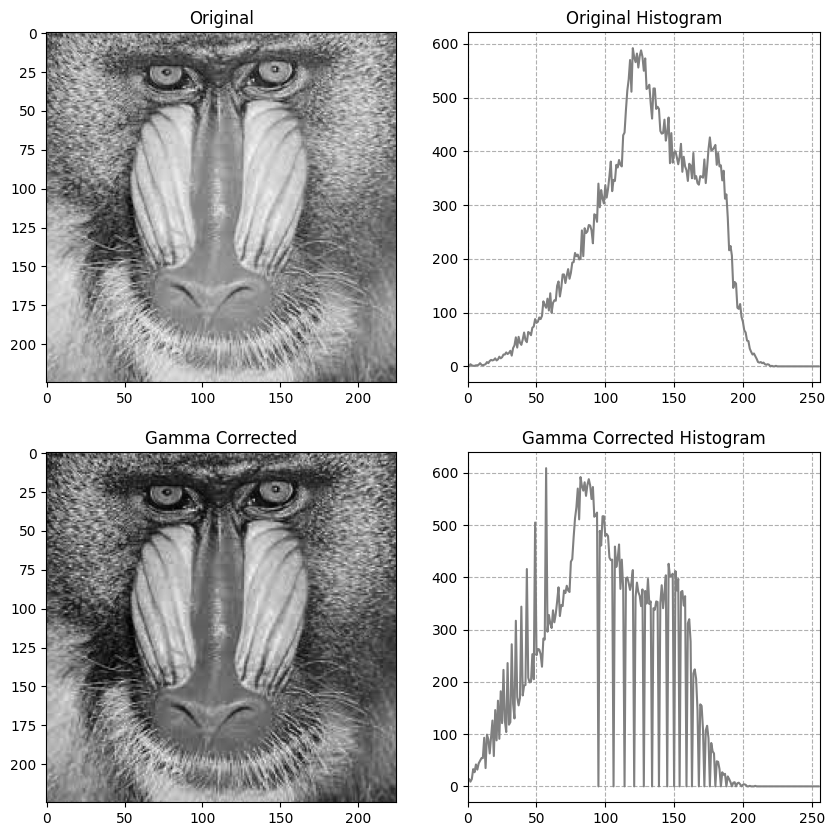


Độ nhiễu của ảnh trước: 38.52 và ảnh sau: 40.03
Số lượng điểm ảnh của ảnh trước: 50625 và ảnh sau: 50625
Độ sáng trung bình của ảnh trước: 130.36 và ảnh sau: 95.88
Độ tương phản của ảnh trước: 0.3 và ảnh sau: 0.42


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
os.chdir('/content/drive/MyDrive/ColabNotebooks')
gray_img = cv2.imread('DCT1203_3120410382.jpg', cv2.IMREAD_GRAYSCALE)

# Define the gamma value
gamma = 1.5

# Compute the look-up table for gamma correction
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

# Apply gamma correction to the grayscale image using the look-up table
gamma_corrected_gray_img = cv2.LUT(gray_img, table)

# Compute the histograms for the original and gamma corrected grayscale images
hist_gray_img = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_gamma = cv2.calcHist([gamma_corrected_gray_img], [0], None, [256], [0, 256])

# Plot the original and gamma corrected grayscale images and their histograms
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Original grayscale image
ax[0,0].imshow(gray_img, cmap='gray')
ax[0,0].set_title('Original')

# Original grayscale image histogram
ax[0,1].plot(hist_gray_img, color='gray')
ax[0,1].set_xlim([0, 256])
ax[0,1].grid(True, linestyle='--', zorder = 0)
ax[0,1].set_title('Original Histogram')

# Gamma corrected grayscale image
ax[1,0].imshow(gamma_corrected_gray_img, cmap='gray')
ax[1,0].set_title('Gamma Corrected')

# Gamma corrected grayscale image histogram
ax[1,1].plot(hist_gamma, color='gray')
ax[1,1].set_xlim([0, 256])
ax[1,1].grid(True, linestyle='--', zorder = 0)
ax[1,1].set_title('Gamma Corrected Histogram')

# Display the plot
plt.show()

# Tính toán độ lệch chuẩn của ảnh xám dựa vào sự đo lường của các giá trị mức xám trong ảnh
std_dev_before = np.std(gray_img)
std_dev_after = np.std(gamma_corrected_gray_img)
print('\nĐộ nhiễu của ảnh trước:', round(std_dev_before,2), 'và ảnh sau:', round(std_dev_after,2))

# Tính toán số lượng điểm ảnh = chiều dài x chiều rộng
height_before, width_before =  gray_img.shape[:2]
height_after, width_after = gamma_corrected_gray_img.shape[:2]
resolution_before = width_before * height_before
resolution_after = width_after * height_after
print("Số lượng điểm ảnh của ảnh trước:", round(resolution_before,2),"và ảnh sau:", round(resolution_after,2))

# Tính độ sáng trung bình
print('Độ sáng trung bình của ảnh trước:', round(cv2.mean(gray_img)[0],2), 'và ảnh sau:', round(cv2.mean(gamma_corrected_gray_img)[0],2))

# Độ tương phản của 2 ảnh bằng cách biểu diễn độ lệch chuẩn của các giá trị pixel trong ảnh (standard deviation)
std_before = np.std(gray_img)
std_after = np.std(gamma_corrected_gray_img)
mean_before = np.mean(gray_img)
mean_after = np.mean(gamma_corrected_gray_img)
constrast_before = std_before / mean_before
constrast_after = std_after / mean_after
print("Độ tương phản của ảnh trước:", round(constrast_before,2), "và ảnh sau:", round(constrast_after,2))

In [ ]:
### TODO 4 : Write a essay in English or Vietnamese to evaluate the above result.
'''
    Gamma Correction cho ảnh xám là một kỹ thuật xử lý ảnh được sử dụng để điều chỉnh độ sáng và độ tương phản của ảnh. 
  Kỹ thuật này sử dụng một giá trị gamma để áp dụng hàm mũ gamma lên từng điểm ảnh của ảnh xám. Khi gamma có giá trị 
  lớn hơn 1, ảnh sẽ trở nên tối hơn và khi gamma có giá trị nhỏ hơn 1, ảnh sẽ trở nên sáng hơn. 

    Yêu cầu: Nhận một ảnh đầu vào là hình ảnh RGB và chọn ra một giá trị gamma phù hợp để điều chỉnh độ sáng và độ 
  tương phản của ảnh, đầu ra là một hình ảnh xám có độ sáng và độ tương phản đã được điều chỉnh bằng Gamma Correction.

    Nhận xét:

      1. Histogram:
    
      - Histogram thứ nhất trước khi cân bằng cho thấy các giá trị ban đầu tập trung nhiều ở khoảng giá trị từ 50 - 175,
      trong khi khoảng giá trị ngoài khoảng này có số lượng pixel rất ít. Khoảng giá trị từ 0 - 50 chỉ có số lượng 
      điểm ảnh rất thấp, và khoảng giá trị từ 200 - 255 cũng có số lượng điểm ảnh giảm dần về phía sau. Điều này 
      cho thấy pixel chỉ tập trung nhiều ở mức sáng trung bình, làm cho ảnh có độ tương phản thấp, chênh lệch giữa 
      các vùng tối và các vùng sáng không rõ ràng, chưa điều chỉnh tốt, các chi tiết ảnh không được thể hiện rõ nét.

      - Histogram của ảnh sau khi áp dụng phương pháp Gamma Correction đã được tăng giá trị mức xám ở các vùng tối (0-100),
      sau đó vẫn giữ ổn định số lượng điểm ảnh khoảng giá trị 100-150 và giảm dần từ 150 trở đi. Điều đó nghĩa là sau khi
      áp dụng GC thì giá trị mức xám được tăng ở các vùng giá trị nhỏ nên làm ảnh có phần tối hơn, nhưng bù lại thì ảnh
      sẽ có độ tương phản cao hơn, các giá trị nằm trong các vùng tối sẽ được tô nét hơn. Và biểu đồ cho thấy pixel chỉ 
      tập trung ở vùng mức xám nhỏ và trung bình, không tập trung ở vùng giá trị cao.
    
      2. Hình ảnh:

      - Ảnh trước khi xử lý có mật độ sáng không rõ ràng, có độ tương phản khá thấp, màu sắc của ảnh không được tự nhiên,
      một số khu vực trên ảnh bị mờ, ví dụ như các chi tiết trên lông và râu của con khỉ.

      - Ảnh sau khi xử lý bằng phương pháp Gamma Correction thì khuôn mặt con khỉ trở nên rõ nét hơn, độ tương phản, 
      độ sáng của bức ảnh được cân bằng, chi tiết giữa các vùng trên khuôn mặt như nếp nhăn, lông, đôi mắt, râu, đường viền
      được làm rõ. Vùng tối được cân bằng để ảnh có độ chi tiết hơn ảnh trước khi xử lý rất nhiều.

      3. Tổng số điểm ảnh: Tổng số lượng điểm của ảnh trước và sau khi xử lý là 50625

      4. Phân bố giá trị: Với ảnh gốc, phân bố giá trị tập trung chủ yếu ở giá trị xám từ 50-200 nhưng vẫn không đồng đều,
      khoảng cách giữa các đỉnh xa nhau, làm cho ảnh có độ tương phản thấp. Với ảnh sau khi xử lý, phân bố giá trị của ảnh
      trở nên đều hơn, rộng hơn, giá trị của kênh xám được tăng cường ở các vùng thấp, giảm giá trị hoặc giữ nguyên ở các 
      vùng cao, từ đó làm tăng độ tương phản và cải thiện chất lượng hình ảnh.

      5. Độ sáng trung bình: Do phân bố giá trị ở trên, kết quả độ sáng trung bình đã giảm từ 130.36 xuống còn 95.88 
      sau khi xử lý, tuy rằng độ sáng đã giảm đi đáng kể nhưng cũng làm tăng độ chi tiết các vùng tối của ảnh, tăng độ
      tương phản. Ví dụ, ở ảnh gốc, lông và mắt của con khỉ do ảnh quá sáng nên không làm nổi bật lên, ở ảnh đã xử lý,
      lông và mắt được thể hiện rõ nét hơn, chi tiết hơn, hay có thể nói là nhìn "có hồn" hơn.

      6. Độ nhiễu: Với ảnh trước khi xử lý là 38.52 và sau khi xử lý là 40.03, điều này cho ta thấy phương pháp này làm
      tăng độ nhiễu của ảnh. Tuy nhiên, một phần do ảnh ban đầu đã bị nhiễu, áp dụng Gamma Correction không làm tăng độ
      nhiễu của ảnh quá đáng kể, nó vẫn giúp cải thiện độ tương phản và chất lượng của ảnh, các chi tiết được xuất hiện
      rõ nét hơn.

      7. Độ tương phản: Ảnh trước khi xử lý là 0.3 và sau khi xử lý là 0.42. Điều này có thể thấy ảnh được nâng cao 
      chất lượng hơn. Đáp ứng được mục tiêu Gamma Correction chính là tăng độ tương phản, tăng giảm độ sáng, cải thiện
      được chất lượng hình ảnh và hiển thị các chi tiết rõ ràng hơn.

'''

## **5. Conclusion**

In [ ]:
### TODO 5 : Write a essay in English or Vietnamese to conclude about the above tasks
'''
      Trong phân tích xử lý ảnh, phương pháp cân bằng histogram và gamma correction là hai phương pháp được sử dụng 
    để tăng cường chất lượng ảnh, tăng độ tương phản và điều chỉnh độ sáng trên bức ảnh đó. Để có thể chọn phương pháp
    nào phù hợp thì nó sẽ phụ thuộc vào nhu cầu và tính chất của bức ảnh mà ta cần xử lý.

  - 1. Đối với ảnh xám

      Cân bằng histogram được sử dụng để tăng độ tương phản và cân bằng phân phối độ sáng trên bức ảnh. Từ việc tạo ra
    phân phối độ sáng đồng đều trên bức ảnh để có thể tăng cường độ tương phản, các chi tiết được hiện chính xác hơn.
    Gamma Correction được sử dụng để điều chỉnh độ sáng, tăng độ tương phản trên bức ảnh bằng cách tập trung vào điều
    chỉnh độ sáng ở các vùng tối hoặc sáng của bức ảnh dựa trên một hàm phi tuyến (hàm gamma).

  - 2. Đối với ảnh màu

      Khi áp dụng cân bằng histogram cho ảnh màu, ta phải tính toán từng histogram cho từng kênh màu (Red, Green, Blue)
    và tìm ra giá trị để có thể cân bằng độ phân bố của các kênh màu. Sau đó, ta mới kết hợp cả 3 kênh màu để tạo ra 
    ảnh màu mới cho độ tương phản và độ sáng tốt hơn. Khi áp dụng gamma correction cho ảnh màu, ta cũng phải cần tính toán
    gamma cho từng kênh màu (Red, Green, Blue) và áp dụng phép tính gamma correction (hàm gamma) cho từng kênh màu. 
    Sau đó, ta kết hợp các kênh màu lại để tạo ra ảnh màu mới với độ sáng và độ tương phản được cải thiện.

  - 3. Sự giống nhau của Cân bằng histogram & Gamma Correction

      Trước hết, cân bằng histogram và gamma correction đểu nhằm mục đích là điều chỉnh được độ tương phản của ảnh. 
    Khi ảnh bị thiếu tương phản thì các chi tiết trong bức ảnh có thể sẽ bị mất và ảnh sẽ trông nhạt nhoà, thiếu 
    sức sống. Việc áp dụng phương pháp cân bằng histogram hay là gamma correction đều mang lại sự hiệu quả trong 
    việc tăng độ tương phản của ảnh và giúp cho ảnh sau khi xử lý được chi tiết và màu sắc hơn.
    
      Thứ hai, cả hai phương pháp đều hoạt động trên giá trị độ sáng của ảnh. Nghĩa là, trong quá trình cân bằng 
    histogram, các giá trị sáng của ảnh được phân bố lại đều trong phạm vi giá trị sáng, trong khi ở gamma correction
    thì tập trung vào việc tăng giảm độ sáng ở các khu vực sáng hoặc tối của ảnh. Vì thế nên cả hai phương pháp đều được
    sử dụng để tăng độ tương phản và cân bằng độ sáng của ảnh.
      
      Cuối cùng, như đã phân tích ở mục 1 và mục 2 thì cả hai phương pháp đều có thể được áp dụng cho cả hai loại ảnh
    là ảnh xám hoặc ảnh màu. Cân bằng histogram và gamma correction đều có thể điều chỉnh được độ sáng và độ tương phản
    nhằm mục đích cải thiện chất lượng của hình ảnh.
      
  - 4. Sự khác nhau của Cân bằng histogram & Gamma Correction

      Sau khi áp dụng cả 2 phương pháp vào trong bức ảnh đầu vào, sự khác nhau chính giữa 2 phương pháp là cách mà 
    chúng sử dụng để điều chỉnh độ sáng và độ cân bằng của ảnh.
      
      Cân bằng histogram thực hiện việc phân bố lại giá trị độ sáng của ảnh để cho các giá trị sáng và tối được phân bố
    đều trên toàn bộ phạm vi độ sáng. Và nó sẽ hoạt động tốt khi ảnh có tương phản thấp hoặc một phần của ảnh quá tối 
    hoặc quá sáng.

      Gamma correction thực hiện điều chỉnh độ sáng của ảnh bằng cách áp dụng một tham số đầu vào là gamma để thay đổi
    hàm phi tuyến. Phương pháp này sẽ phụ thuộc vào tham số gamma, khi giá trị gamma nhỏ hơn 1 thì ảnh được làm tối hơn,
    gamma lớn hơn 1 thì ảnh sẽ được làm sáng hơn. Tuy nhiên, nếu một số trường hợp ngoại lệ như gamma nhỏ hơn 1 mà ảnh
    sáng hơn hoặc gamma lớn hơn 1 mà ảnh được làm tối hơn thì có thể là do một số nguyên nhân như giá trị của gamma quá lớn,
    độ sáng ban đầu của ảnh quá cao, ánh sáng và màu sắc trong ảnh ban đầu không đồng đều. Cho nên, vì vấn đề này, quan trọng
    nhất trong việc sử dụng phương pháp Gamma Correction là kiểm tra lại giá trị của gamma, tìm được giá trị gamma phù hợp 
    và xem xét các yếu tố khác có ảnh hưởng đến bức ảnh.
  
  - 5. Hạn chế của Cân bằng histogram & Gamma Correction

      Đối với Gamma Correction, việc chọn sai giá trị của tham số gamma sẽ làm ảnh hưởng chất lượng của ảnh. Nếu gamma
    quá lớn hoặc quá nhỏ, ảnh có thể sẽ bị nhiễu và trông kém chất lượng hơn.
      
      Đối với Cân bằng histogram, áp dụng phương pháp này quá nhiều cũng có thể làm cho màu sắc trở nên không tự nhiên
    và mất cân bằng màu, khiến cho ảnh trở nên mờ hoặc mất chi tiết ảnh.
      
      Cả hai phương pháp đều chỉ đáp ứng được vấn đề độ sáng của ảnh, chứ không trực tiếp giải quyết các vấn đề liên quan
    đến màu sắc hoặc sự tương phản. Lý do là khi ta xử lý ảnh bằng 2 phương pháp trên thì độ sáng của một số pixel trong ảnh
    có thể đạt đến giá trị trắng (255), trong khi các pixel khác vẫn giữ nguyên giá trị. Do đó, khoảng cách giữa các giá trị
    sẽ được tăng lên, tăng độ tương phản của ảnh, tăng độ sáng quá mức cũng sẽ dẫn đến việc mất chi tiết trong các vùng tối
    của ảnh, chính vì thế nên việc tăng độ tương phản có thể không mang lại kết quả như mong muốn.

  - 6. Kết luận

      Như vậy, việc lựa chọn phương pháp xử lý ảnh phụ thuộc vào mục đích sử dụng ảnh. Nếu mục đích chỉ là cân bằng độ sáng
    của ảnh thì cả Gamma Correction và Cân bằng histogram đều có thể áp dụng vào trong xử lý. Tuy nhiên, cần lưu ý rằng cả 2
    phương pháp đều có hạn chế của nó, việc sử dụng Gamma Correction với giá trị gamma quá lớn hoặc quá nhỏ có thể làm cho ảnh
    quá sáng hoặc quá tối làm mất đi chi tiết của ảnh, và việc sử dụng Cân bằng histogram có thể làm mất đi sự phân bố màu sắc
    tự nhiên của ảnh. Do đó, cần phải cân nhắc kỹ lưỡng và sử dụng các giá trị thích hợp để 2 phương pháp mang lại kết quả tốt nhất.
      
      Với quan điểm cá nhân, nếu mục đích là tăng độ tương phản và tạo sự tương phản giữa các màu sắc thì Gamma Correction sẽ là
    lựa chọn tốt hơn, ta có thể tuỳ ý điều chỉnh tham số gamma cho phép điều chỉnh độ cong và đường cong đồng dạng, từ đó điều chỉnh
    được độ tối hoặc sáng của ảnh một cách chi tiết và linh hoạt hơn. Nếu mục đích là tăng độ tương phản và giữ nguyên màu sắc thì
    Cân bằng histogram sẽ là phương pháp phù hợp hơn. Nếu mục đích là tăng độ tương phản và giữ nguyên cả sắc thái màu và độ tương phản
    thì có thể sử dụng cả 2 phương pháp kết hợp với nhau.
      
      Nói tóm lại, cả hai phương pháp đều có ưu nhược điểm riêng, không thể khẳng định rằng phương pháp Gamma Correction hay Cân bằng
    Histogram tốt hơn, ta cần phải xác định rõ mục đích sử dụng của ảnh và đánh giá kỹ càng trước áp dụng phương pháp nào cho phù hợp.
      
'''